In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from numpy.linalg import eigh, svd

In [ ]:
# http://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

In [138]:
url = 'https://raw.githubusercontent.com/probml/pmtkdata/master/lsi/lsiMatrix.txt'
X = pd.read_table(url, header = None, sep = ' ').values.T[:-1]
X = X[:8, :3]
X = scale(X)
N = len(X)
X.shape

(8, 3)

In [141]:
C = X.T.dot(X) / (N - 1.0)
d, V = eigh(C)
d = d[::-1]
D = np.diag(d)
V = V[:, ::-1]
print D
print V

[[ 1.49838344  0.          0.        ]
 [ 0.          0.78733085  0.        ]
 [ 0.          0.          0.        ]]
[[-0.70710678 -0.70710678  0.        ]
 [ 0.          0.         -1.        ]
 [-0.70710678  0.70710678  0.        ]]


In [142]:
U, s, Vt = svd(X)
d = s * s / (N - 1)
D = np.diag(d)
V = Vt.T
print D
print V

[[ 1.49838344  0.          0.        ]
 [ 0.          0.78733085  0.        ]
 [ 0.          0.          0.        ]]
[[-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [-0.70710678 -0.70710678  0.        ]]


In [129]:
print d
print np.diag(D)

[ 7.12333351  0.55676421  0.37700426  0.28096075  0.26476246  0.17426884
  0.10514332  0.07636257  0.06100792]
[ 7.12333351  0.55676421  0.37700426  0.28096075  0.26476246  0.17426884
  0.10514332  0.07636257  0.06100792]


In [96]:
q = np.zeros((460, 1))
q[22] = 1
Q = np.hstack([X, q])
Q.shape

(460, 10)

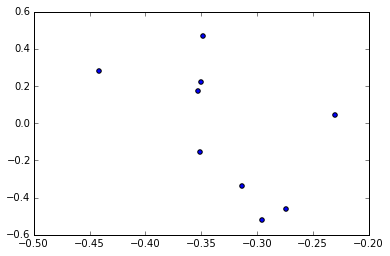

In [98]:
U, s, Vt = svd(X)
plt.scatter(Vt[0, :], Vt[1, :])
plt.show()

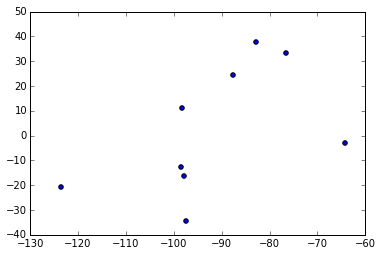

In [102]:
U, s, Vt = svd(X.T)
S = np.diag(s)
Z = U[:, :2].dot(S[:2, :2])
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()